Obj: Plot contours of ALMA arcs over the velocity dispersion map

In [1]:
from astropy.io import fits
import astropy.wcs as wcs
import astropy

import matplotlib.pyplot as plt
from matplotlib import rcParams




file_path = "/home/carlos/Desktop/SDP/Dynamics/pPXF/Data"   #path to data

In [2]:
#Alma arcs
#Open ALMA image

arcs_hdu = fits.open(file_path+"/SDP81_band7_11exec.contR1_cut.fits")

arcs_image = arcs_hdu[0].data                                               #Image
arcs_wcs = wcs.WCS(arcs_hdu[0].header,relax=astropy.wcs.WCSHDR_PROJPn)      #Wcs
                                                                                #Attention to relax keyword
                                                                                #This is necessary because the wcs 
                                                                                #format for ALMA images are strange

indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

In [3]:
#Getting only the celestial wcs from ALMA image 

arcs_celestial_wcs = arcs_wcs.celestial            #celestial wcs
arcs_celestial_wcs


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 135.798375  0.6518611111111  
CRPIX : 272.000000000002  452.000000000002  
CD1_1 CD1_2  : -1.388888888889e-06  0.0  
CD2_1 CD2_2  : 0.0  1.388888888889e-06  
NAXIS : 841  841

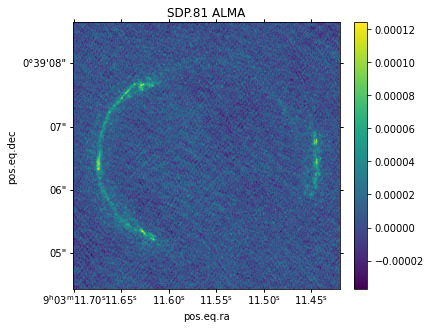

In [4]:
#Ploting ALMA image

fig = plt.figure()
fig.add_subplot(111, projection=arcs_celestial_wcs)
plt.imshow(arcs_image, cmap='viridis', aspect=1, interpolation='nearest', origin='lower')
plt.title('SDP.81 ALMA')
plt.colorbar(orientation='vertical', fraction=0.046,  pad=0.04)
plt.tight_layout()
plt.show()

In [11]:
#Now save the ALMA image only with the celestial WCS
save_path = "/home/carlos/Desktop/SDP/Dynamics/Plot contour/Data"

header = arcs_celestial_wcs.to_header()
fits.writeto(filename=save_path+"/ALMA.fits", data=arcs_image,header=header)

In [5]:
#Velocity RMS map
#Open Vrms map

disp_hdu = fits.open(file_path+"/RMS_Velocity_Map.fits")    

disp_image = disp_hdu[1].data                 #Image
disp_wcs = wcs.WCS(disp_hdu[1].header)        #WCS



In [8]:
#Getting only the celestial wcs from Vrms image 

disp_celestial_wcs = disp_wcs.celestial            #celestial wcs
disp_celestial_wcs


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 135.798146  0.65176  
CRPIX : 34.617263403836  26.687544954161  
CD1_1 CD1_2  : -5.5555555555556e-05  0.0  
CD2_1 CD2_2  : 0.0  5.5555555555556e-05  
NAXIS : 60  60

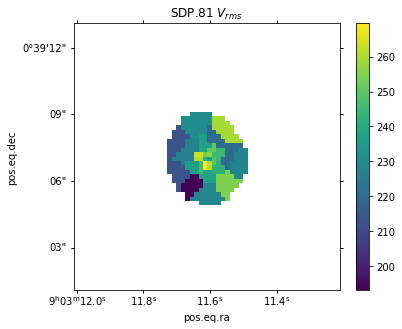

In [9]:
#Plot Vrms map

fig = plt.figure()
fig.add_subplot(111, projection=disp_celestial_wcs)
plt.imshow(disp_image, cmap='viridis', aspect=1, interpolation='nearest', origin='lower')
plt.title('SDP.81 $V_{rms}$')
plt.colorbar(orientation='vertical', fraction=0.046,  pad=0.04)
plt.tight_layout()
plt.show()                                                                          